# O método da Busca Harmônica

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import pylab as py
import math as ma
import random
from random import *
from IPython.display import Latex
#novos pacotes de imagem
import imageio
from skimage import data, io, filters
%matplotlib inline

O algoritmo de busca harmônica foi originalmente desenvolvido por Geem and Loganathan(2001) e foi originalmente baseado nos processos de improvisação dos músicos jazzianos.   

Nesta lógica, cada músico corresponde a uma variável de decisão.

O instrumento musical corresponde a faixa  de valores onde o passo é uma faixa de valores em uma variável de decisão.

A harmonia musical corresponde a um vetor de soluções em uma determinada iteração.

 A estética da audiência corresponde a função objetivo que se quer minimizar. 

Assim como um músico melhora a sua harmonia musical com o tempo o vetor de soluções é melhorado após cada iteração. 

## Formulação do problema

O problema necessita de uma função objeto para ser otimizada variáveis dependentes e idependentes.  

O algoritmo realiza uma busca no espaço de soluções com o objetivo de achar o vetor de soluções que otimiza a função objetivo. 

Seja ***HM*** o vetor *Harmony Memory* onde cada posição na memória é ocupada por uma harmonia de tamanho ***n***. E o número de harmonias é ***m***.


\begin{equation*}
  HM=
  \left[ {\begin{array}{cc}
   \{x_{1,1} & x_{1,2} & x_{1,3} & \cdots & x_{1,n} & | f(\vec{x}_{1,n})  \}\\
   \{x_{2,1} & x_{2,2} & x_{2,3} & \cdots & x_{2,n} & | f(\vec{x}_{2,n})  \}\\
   \{x_{3,1} & x_{3,2} & x_{3,3} & \cdots & x_{3,n} & | f(\vec{x}_{3,n})  \}\\
   \vdots & \vdots & \vdots & \ddots & \vdots & \vdots\\
   \{x_{4,1} & x_{4,2} & x_{4,3} & \cdots & x_{m,n} & | f(\vec{x}_{m,n})\}\\
  \end{array} } \right]
\end{equation*}


## Pseudo-código

\begin{enumerate}
\item Inicie a memória harmônica, selecionando k vetores aleatórios $x_{1},...,x_{k}$
\item repita
\item    crie um novo vetor x'
\item    para cada componente $x'_{i}$, faça
\item        com probabilidade $p_{hmcr}$, faça $x'_{i} \longleftarrow x_{i}^{int(rand(0,1)*k+1)}$
\item        com probabilidade $1- p_{hmcr}$, escolha um novo valor aleatório no intervalo 
\item para cada componente $x'_{i}$
\end{enumerate}


***Parâmetros***: HMS, HMCR, PAR, MI, FW

***Início***

Função Objetivo $f(\vec{x}), \vec{x}=[x_{1},x_{2},...x_{n}]$

Inicialização da Memória Harmônica $x^{i},i=1,2,...,m$

Avalia cada harmonia na ***HM***: $f(x^{i})$

ciclo $\longleftarrow$ 1

***ENQUANTO*** ciclo $<$ MI ***FAÇA***

***PARA*** j$\longleftarrow$ 1 até n ***FAÇA***

***SE*** gerador_aleatorio() $\leq$ HMCR ***ENTÃO*** {taxa de consideração na memória}

$x_{i,j}' \longleftarrow x_{i,j}$, com i $\in$ $[1,m]$ {escolhido aleatoriamente}

***SE*** gerador_aleatorio() $\leq$ PAR ***ENTÃO*** {taxa de ajuste fino}

$x_{i,j}' \longleftarrow x_{i,j}'+u(-1,1) \times FW $

***FIM SE***

***SENÃO*** {seleção aleatória}

Gera $x_{i,j}'$ aleatoriamente 

***FIM SE***

***FIM PARA***

Avalia a nova Harmonia gerada: $f(x')$

***SE*** $f(x')$ é melhor que a pior Harmonia na HM ***ENTÃO***

Atualiza Memória Harmônica

***FIM SE***

ciclo $\longleftarrow$ ciclo + 1

Verifica o critério de parada

***FIM ENQUANTO***

Exibição dos resultados

***FIM***

## O programa de busca harmônica (BH.f08)

\begin{enumerate}
\item A função objetivo é a função ajuste. O código tenta minimizar $x_{1}+x_{2}$ (linha 102 - qualquer tipo de função pode ser colocada aqui), PVB seta o tamanho das variáveis (linhas 124-127)
\item O programa principal se chama BH.f08.  
\item O programa guarda a melhor solução calculada na variável BestGen, e imprime na tela a solução a cada 1000  passos e armazena no arquivo ajuste.txt (213-214)
\end{enumerate}


In [15]:
fit=np.loadtxt('ajuste.txt')
print(fit)

[[-12.46311716   0.           0.        ]
 [-19.02452318   9.51226159   9.51226159]
 [-19.02452318   9.51226159   9.51226159]
 [-19.06740152   9.53370076   9.53370076]
 [-19.22880322   9.61440161   9.61440161]
 [-19.22880322   9.61440161   9.61440161]
 [-19.22880322   9.61440161   9.61440161]
 [-19.22880322   9.61440161   9.61440161]
 [-19.22955426   9.61477713   9.61477713]
 [-19.46099371   9.73049685   9.73049685]]


In [16]:
x=fit[:,0]
y=fit[:,1]
z=fit[:,2]

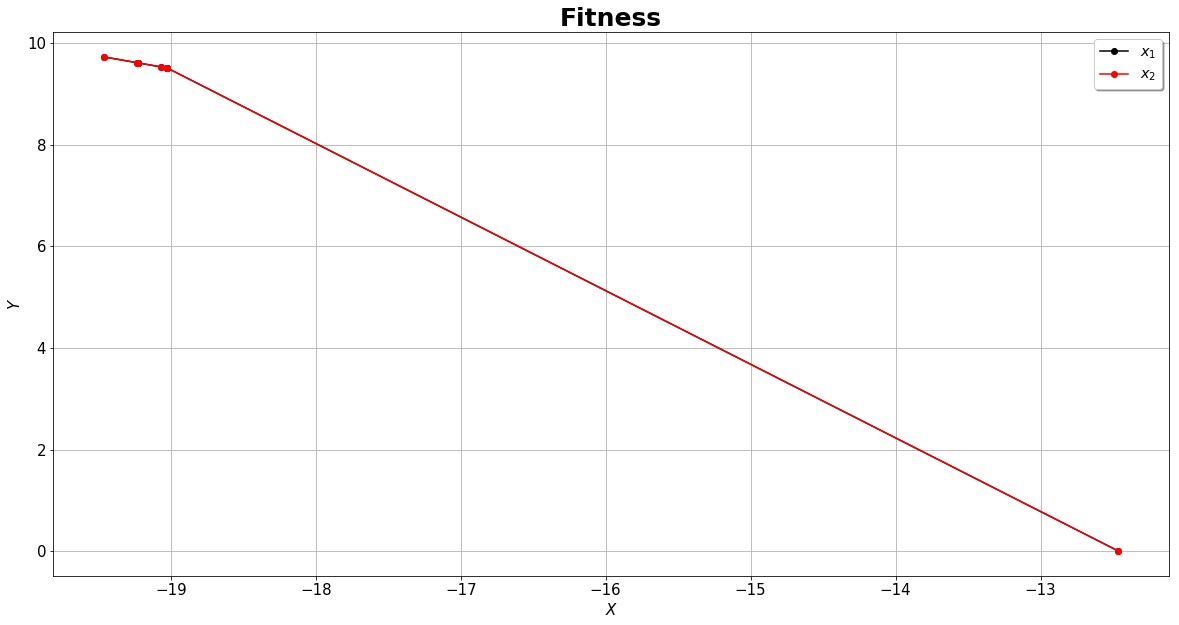

In [17]:
py.rcParams['figure.figsize'] = (20.0, 10.0)#Redimensiona a figura

plt.plot( x, y, 'ko-',label="$x_{1}$") 
plt.plot( x, z, 'ro-',label="$x_{2}$") 


legend = plt.legend(loc='upper right', shadow=True, fontsize='x-large')

plt.title("Fitness", fontweight='bold', fontsize=25)
plt.tick_params(axis='both', labelsize=15)


plt.grid(True)
plt.xlabel("$X$", fontsize=15)
plt.ylabel("$Y$", fontsize=15)
plt.savefig('Ajuste.png')  
plt.show()  
plt.close()